In [1]:
import os
import pathlib

# Third-party imports.
import numpy as np
import matplotlib.pyplot as plt

from obspy import *
import scipy.signal as sg

from pyFRF import FRF
from sdypy import EMA

In [29]:
# compute source time function:

def stf(fz, center_frequency, sampling_rate, nsamples):
    wavelet_width_in_seconds = 0.1075
    time_step_in_seconds = 1. / sampling_rate

    sigma_2 = 1 / (np.pi * center_frequency) ** 2

    time = np.linspace(
        -wavelet_width_in_seconds,
        wavelet_width_in_seconds,
        int((2 * wavelet_width_in_seconds / time_step_in_seconds)),
    )

    #sampling_rate_in_hertz = 1.0 / time_step_in_seconds

    wavelet = (1 - (2 * time**2) / sigma_2) * np.exp(-(time**2) / sigma_2)
    nzeros_5s = int(5.0 * sampling_rate)
    wavelet_long = np.concatenate((np.zeros(nzeros_5s), wavelet))
    nzeros = nsamples - len(wavelet_long)

    wavelet_longer = np.concatenate((wavelet_long, np.zeros(nzeros)))
    return time, wavelet * fz, wavelet_longer

In [30]:
!ls

EMA_Analysis.ipynb	 modal_analysis_from_felix.py  RY_PlotDataAll.ipynb
event_png_m7_data.mseed  noise_data_2.mseed	       short_local_event.mseed
ffb1_m7.mseed		 noise_data.mseed	       short_local_event.txt
lf_event_data.mseed	 oma_anaylsis.ipynb	       tractor_data.mseed
make_stationxml.ipynb	 RY_CheckData.ipynb


In [58]:
# fz = 1e3

# center_frequency = 15.0

# sampling_rate = st[0].stats.sampling_rate

# nsamples = st[0].stats.npts

# time, wavelet, wavelet_long = stf(fz, center_frequency, sampling_rate, nsamples)

# freq, psd = sg.welch(wavelet_long, fs=sampling_rate, window='hann', nperseg=None, noverlap=None, nfft=None, 
#                      detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')

# plt.plot(time, wavelet)
# plt.show()
# plt.plot(freq, psd)
# plt.show()

In [61]:
# _frf = []

# for i in range(13):
#     #st = read('../MSEED/XX.S'+str(int(i+1)).zfill(2)+'..HHZ_v2445_0.2_epw150_fz1000.0')
#     #st = read('../MSEED/XX.S'+str(int(i+1)).zfill(2)+'..HHZ_v773_0.3_epw15_fz1000.0')
#     st = read('../MSEED/XX.S'+str(int(i+1)).zfill(2)+'..HHZ_v1929_0.2_epw150_fz1000.0')
    
#     h = st[0].data
#     frf = FRF(sampling_freq=sampling_rate, exc=wavelet_long, resp=h, exc_window='None', resp_type='a', resp_window='None')
#     print(frf.get_FRF())
#     _frf.append(frf.get_FRF()[1:])

# _frf = np.asarray(_frf)
# freq = frf.get_f_axis()[1:]

# plt.semilogy(freq, np.abs(_frf.T), '.', label='via FRF')
# #plt.semilogy(f, np.abs(H1_syn), label='Synthetic')
# plt.title('FRF H1')
# plt.legend();
# plt.show()


# acc = EMA.Model(frf=_frf, 
#                  freq=freq,
#                  lower=1, 
#                  upper=20,
#                  pol_order_high=60,
#                  frf_type='accelerance')

# acc.get_poles()
# acc.select_poles()
# #n_freq =  [1.9, 2.1, 4.6, 6.0]
# #acc.select_closest_poles(n_freq)


# frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')


# print(acc.A.shape)
# acc.print_modal_data()

# plt.plot(acc.normal_mode()[:, :])
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../MSEED/XX.S01..HHZ_v1929_0.2_epw150_fz1000.0'

In [166]:
st = read('./event_png_m7_data.mseed')

In [167]:
ffb1 = read('./ffb1_m7.mseed')

In [168]:
st = st.resample(20)

In [169]:
tbeg, tend = UTCDateTime("2023-04-02T20:15:00"), UTCDateTime("2023-04-02T20:18:00")
tbeg, tend = UTCDateTime("2023-04-02T20:15:55"), UTCDateTime("2023-04-02T20:16:10")

st = st.trim(tbeg, tend)
ffb1 = ffb1.trim(tbeg, tend)

In [170]:
ffb1[0].data[0:100] = 0
ffb1[0].data[-150:-1] = 0


In [171]:
st.select(channel="*Z")

7 Trace(s) in Stream:
XX.RY01..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples
XX.RY02..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples
XX.RY03..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples
XX.RY05..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples
XX.RY06..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples
XX.RY07..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples
XX.RY08..HHZ | 2023-04-02T20:15:55.000000Z - 2023-04-02T20:16:10.000000Z | 20.0 Hz, 301 samples

In [172]:
for tr in st:
    if tr.stats.station not in ["RY01","RY02","RY03"]:
        st = st.remove(tr);

In [173]:
ffb1[0].data /= 1e5

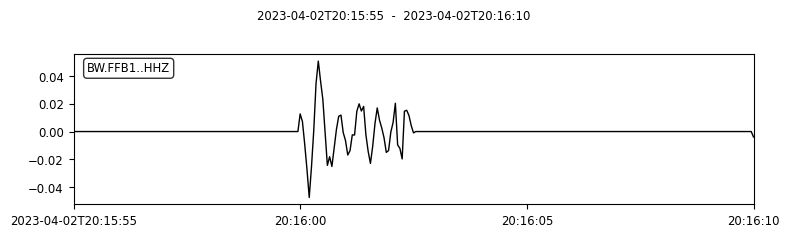

In [174]:
ffb1.plot();

In [175]:
_frf = []

comp = "Z"

for i in range(len(st)):
   
    if comp not in st[i].stats.channel:
        continue
        
    h = st[i].data
    
    frf = FRF(sampling_freq=st[i].stats.sampling_rate,
              exc=ffb1[0].data,
              resp=h,
              exc_window='None',
              resp_type='a',
              resp_window='None'
             )
    
#     print(frf.get_FRF())
    
    _frf.append(frf.get_FRF()[1:])


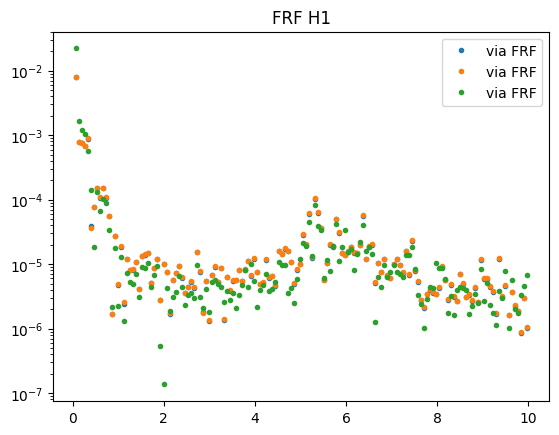

In [176]:
_frf = np.asarray(_frf)
freq = frf.get_f_axis()[1:]

plt.semilogy(freq, np.abs(_frf.T), '.', label='via FRF')
#plt.semilogy(f, np.abs(H1_syn), label='Synthetic')
plt.title('FRF H1')
plt.legend();
plt.show()


100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 206.80it/s]


(3, 1)
   Nat. f.      Damping
-----------------------
1)    5.3	-0.0051


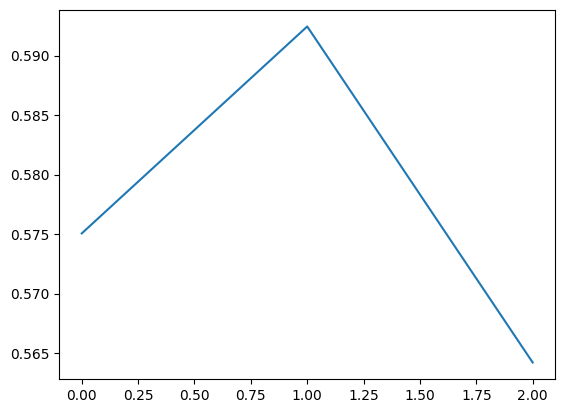

In [177]:
acc = EMA.Model(frf=_frf, 
                 freq=freq,
                 lower=0.1, 
                 upper=20,
                 pol_order_high=60,
                 frf_type='accelerance')

acc.get_poles()
acc.select_poles()
#n_freq =  [1.9, 2.1, 4.6, 6.0]
#acc.select_closest_poles(n_freq)


frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')


print(acc.A.shape)
acc.print_modal_data()

plt.plot(acc.normal_mode()[:, :])
plt.show()